In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import cv2
import pickle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from ultralytics import YOLO
import sys
sys.path.append('../src')
%load_ext autoreload
%autoreload 2
from extract_data.extract_data import classify_chart, rescale_bar_heights, rescale_scatter_points, rescale_lineplot_points
from extract_data.extract_data import get_bar_graph, get_dotplot, get_scatter_graph, get_lineplot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
classify_model = pickle.load(open('/Users/matt/Desktop/graphs-capstone/models/subset_with_augs_model.pkl','rb'))

scatter_model = YOLO('/Users/matt/Desktop/graphs-capstone/models/scatterplot_model.pt')
bar_model = YOLO('/Users/matt/Desktop/graphs-capstone/models/barplot_model.pt')
dot_model = YOLO('/Users/matt/Desktop/graphs-capstone/models/dotplot_model.pt')
line_model = YOLO('/Users/matt/Desktop/graphs-capstone/models/lineplot_model.pt')
barh_model = YOLO('/Users/matt/Desktop/graphs-capstone/models/barHplot_model.pt')


In [3]:
data = pd.read_csv('/Users/matt/Desktop/graphs-capstone/data/interim/annots_imgs_merged.csv')
data.head()

,Unnamed: 0,source,chart-type,text,data-series,plot-bb.height,plot-bb.width,plot-bb.x0,plot-bb.y0,axes.x-axis.ticks,...,axes.y-axis.ticks,axes.y-axis.tick-type,axes.y-axis.values-type,visual-elements.bars,visual-elements.boxplots,visual-elements.dot points,visual-elements.lines,visual-elements.scatter points,file_name,image_path
0,0,generated,scatter,"[{'id': 0, 'polygon': {'x0': 85, 'x1': 478, 'x...","[{'x': 1949.4200576738224, 'y': 66.68303958393...",231,416,57,65,"[{'id': 9, 'tick_pt': {'x': 57, 'y': 295}}, {'...",...,"[{'id': 1, 'tick_pt': {'x': 57, 'y': 65}}, {'i...",markers,numerical,[],[],[],[],"[[{'x': 89.33333333333334, 'y': 75.59999999999...",e91e28111e86,../data/interim/Scatterplots/e91e28111e86.jpg
1,1,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 109, 'x1': 355, '...","[{'x': 'Jordan', 'y': 88.35159235668789}, {'x'...",164,393,68,37,"[{'id': 11, 'tick_pt': {'x': 87, 'y': 200}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 68, 'y': 37}}, {'i...",markers,numerical,"[{'height': 103, 'width': 19, 'x0': 77, 'y0': ...",[],[],[],[],75c0449f6917,../data/interim/Barplots/75c0449f6917.jpg
2,2,generated,scatter,"[{'id': 0, 'polygon': {'x0': 113, 'x1': 383, '...","[{'x': 0.9445463278316278, 'y': 52.13870797394...",203,409,54,21,"[{'id': 3, 'tick_pt': {'x': 54, 'y': 223}}, {'...",...,"[{'id': 17, 'tick_pt': {'x': 54, 'y': 21}}, {'...",markers,numerical,[],[],[],[],"[[{'x': 68.76190476190474, 'y': 188.2023809523...",66dd2a250237,../data/interim/Scatterplots/66dd2a250237.jpg
3,3,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 71, 'x1': 465, 'x...","[{'x': 'Cuba', 'y': 75695.38632268383}, {'x': ...",165,396,89,60,"[{'id': 14, 'tick_pt': {'x': 110, 'y': 225}}, ...",...,"[{'id': 3, 'tick_pt': {'x': 89, 'y': 60}}, {'i...",markers,numerical,"[{'height': 124, 'width': 12, 'x0': 104, 'y0':...",[],[],[],[],58595c30beab,../data/interim/Barplots/58595c30beab.jpg
4,4,generated,scatter,"[{'id': 0, 'polygon': {'x0': 75, 'x1': 461, 'x...","[{'x': 0.8933632249058832, 'y': 5.440194292653...",165,394,79,69,"[{'id': 12, 'tick_pt': {'x': 79, 'y': 233}}, {...",...,"[{'id': 3, 'tick_pt': {'x': 79, 'y': 69}}, {'i...",markers,numerical,[],[],[],[],"[[{'x': 93.33333333333333, 'y': 210.9666666666...",497a547454d7,../data/interim/Scatterplots/497a547454d7.jpg


In [4]:
labelencoder=LabelEncoder()
labels = to_categorical(labelencoder.fit_transform(data['chart-type']))
labels = list(labelencoder.classes_)
labels

['dot', 'horizontal_bar', 'line', 'scatter', 'vertical_bar']

In [5]:
scatter = data[data['chart-type'] == 'scatter'].reset_index(drop=True)
bar = data[data['chart-type'] == 'vertical_bar'].reset_index(drop=True)
dot = data[data['chart-type'] == 'dot'].reset_index(drop=True)
line = data[data['chart-type'] == 'line'].reset_index(drop=True)
barh = data[data['chart-type'] == 'horizontal_bar'].reset_index(drop=True)

In [6]:
scatter_path = scatter['image_path'][0]
bar_path = bar['image_path'][0]
dot_path = dot['image_path'][0]
line_path = line['image_path'][0]
barh_path = barh['image_path'][0]

In [7]:
scatter_pred =classify_chart(scatter_path)
bar_pred = classify_chart(bar_path)
dot_pred = classify_chart(dot_path)
line_pred = classify_chart(line_path)
barh_pred = classify_chart(barh_path)
print('Predictions:',scatter_pred, bar_pred, dot_pred, line_pred, barh_pred)

Predictions: scatter vertical_bar dot line line


# Scatterplots

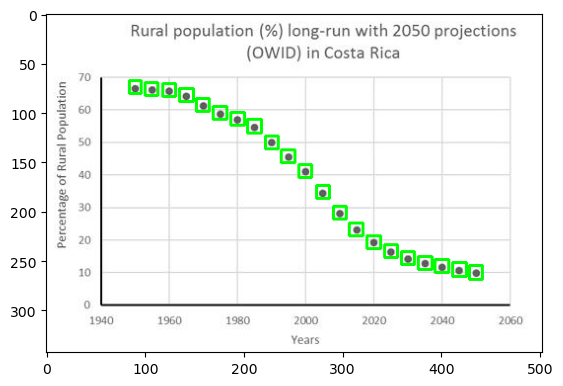

In [65]:
results = scatter_model(scatter_path, verbose=False)

# Extract bboxes from model prediction
img = cv2.imread(scatter_path)
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()

In [186]:
scatter_pred = get_scatter_graph(scatter_path, 1940, 2060, 0, 70,
                          'Years','Percentage of Rural Population',
                          'Rural Population (%) long-run with 2050 projections in Costa Rica')

# Barplots

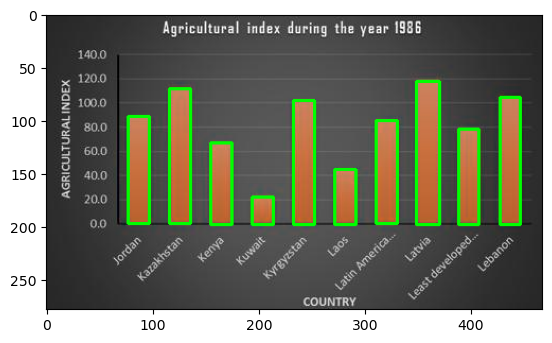

In [75]:
results = bar_model(bar_path, verbose=False)

# Extract bboxes from model prediction
img = cv2.imread(bar_path)
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()

In [80]:
xlabels = ['Jordan',
            'Kazakhstran',
            'Kenya',
            'Kuwait',
            'Kyrgyzstan',
            'Laos',
            'Latin America','Latvia',
            'Least Developed',
            'Lebanon']

In [100]:
bar_pred = get_bar_graph(bar_path, 0, 140, xlabels,
                          'Country','Agriculture','Agricultural Index during 1986')

# Dotplots

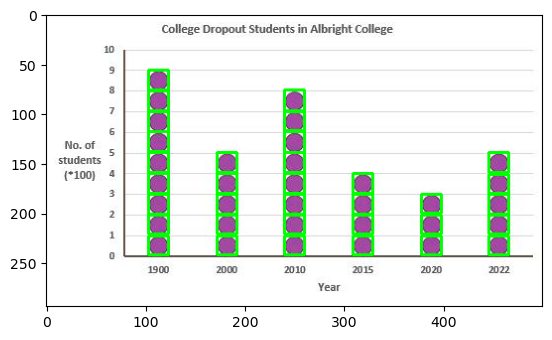

In [126]:
results = dot_model(dot_path, verbose=False)

# Extract bboxes from model prediction
img = cv2.imread(dot_path)
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()

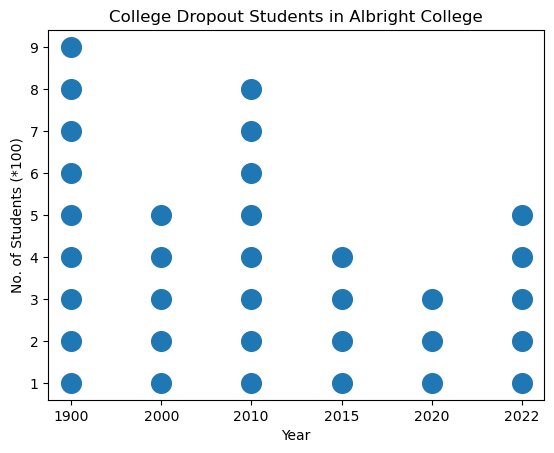

In [148]:
dot_labels = ['1900','2000','2010','2015','2020','2022']
get_dotplot(dot_path, dot_labels,
            'Year',
            'No. of Students (*100)',
            'College Dropout Students in Albright College')

# Lineplots

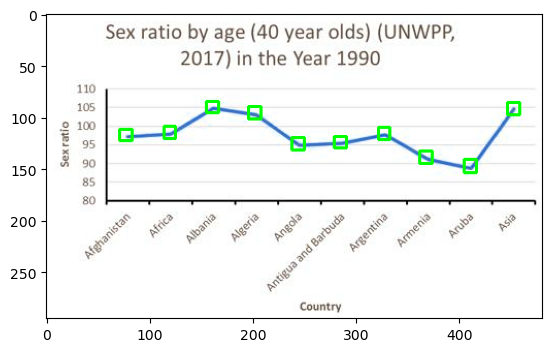

In [8]:
results = line_model(line_path, verbose=False)

# Extract bboxes from model prediction
img = cv2.imread(line_path)
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()

In [13]:
line_labels = ['Afghanistan', 'Africa','Albania','Algeria','Angola','Antigua and Barbuda',
               'Argentina','Armenia','Aruba','Asia']

line_pred = get_lineplot(line_path, 80, 110, line_labels, 'Country',
                         'Sex Ratio','Sex Ratio by Age in the year 1990')

# Barh

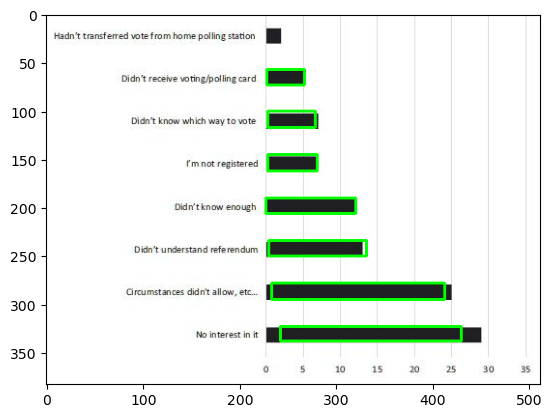

In [163]:
barh_path = barh['image_path'][7]
results = barh_model(barh_path, verbose=False)

# Extract bboxes from model prediction
img = cv2.imread(barh_path)
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()